## **ESTUDIO DE VENTAS DE UNA TIENDA**

# Ojeamos los metadatos.
Can you predict how much a customer will spend in our fictional shop? This is a simulated data set. The intention was not to create realistic data but data with interesting/odd patterns.

- Gender
- Age
- City
- Income
- Relationship: Boolean feature (True when the person is in a relationship otherwise false)
- Children: Boolean feature (True when the person has children otherwise false)
- Degree: Highest degree
- Review: Review for previous purchases ('No Prior Purchase' when first time purchase, 'No Review' when there was no rating given, otherwise on a scale from 0 to 5)
- y: The amount of money spent in our shop



In [ ]:
import pandas as pd
import numpy as np

In [ ]:
tienda=pd.read_csv('/content/drive/MyDrive/PROYECTO FINAL/simulated_customers.csv')
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233484 entries, 0 to 233483
Data columns (total 10 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   index         233484 non-null  int64  
 1   gender        233484 non-null  object 
 2   age           233484 non-null  float64
 3   city          233484 non-null  object 
 4   income        233484 non-null  float64
 5   relationship  163749 non-null  object 
 6   children      186451 non-null  object 
 7   degree        161514 non-null  object 
 8   review        233484 non-null  object 
 9   y             233484 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 17.8+ MB


In [ ]:
tienda.columns.tolist()

['index',
 'gender',
 'age',
 'city',
 'income',
 'relationship',
 'children',
 'degree',
 'review',
 'y']

In [ ]:
tienda.head()

,index,gender,age,city,income,relationship,children,degree,review,y
0,0,M,32.0,Simsinnati,9798.58,True,False,Master,No Prior Purchase,420.0
1,1,W,63.0,Notaplace,8385.68,False,False,Bachelor,No Prior Purchase,154.0
2,2,W,45.0,Simsinnati,1754.24,True,True,NaN,3,15.0
3,3,M,58.0,Simsinnati,2356.89,False,False,NaN,No Review,38.0
4,4,W,34.0,Doesnotexist,1599.34,True,NaN,NaN,No Review,41.9


Vemos el porcentaje de nulos que tenemos

In [ ]:
round(tienda.isnull().sum()/len(tienda.index),2)*100

index            0.0
gender           0.0
age              0.0
city             0.0
income           0.0
relationship    30.0
children        20.0
degree          31.0
review           0.0
y                0.0
dtype: float64

Vamos viendo los distintos valores que tienen nuestras columnas

In [ ]:
tienda['city'].unique()

array(['Simsinnati', 'Notaplace', 'Doesnotexist', 'Faketon'], dtype=object)

In [ ]:
tienda['review'].unique()

array(['No Prior Purchase', '3', 'No Review', '4', '5', '1', '2', '0'],
      dtype=object)

In [ ]:
tienda.drop(['index', 'city'],axis=1, inplace=True)

Me planteo eliminar una serie de columnas que no son necesarias, 'city', 'index'.
Así como los valores nulos de la columna 'review' rellenarlos por 0, para la transformación en una variable numérica

In [ ]:
tienda= tienda.replace('No Prior Purchase', '0')
tienda= tienda.replace('No Review', '0')
tienda.head()


,gender,age,income,relationship,children,degree,review,y
0,M,32.0,9798.58,True,False,Master,0,420.0
1,W,63.0,8385.68,False,False,Bachelor,0,154.0
2,W,45.0,1754.24,True,True,NaN,3,15.0
3,M,58.0,2356.89,False,False,NaN,0,38.0
4,W,34.0,1599.34,True,NaN,NaN,0,41.9


In [ ]:
tienda['review'].unique()

array(['0', '3', '4', '5', '1', '2'], dtype=object)

Cambiamos el tipo de variable

In [ ]:
tienda['review']= tienda['review'].astype('int')

In [ ]:
tienda['review'].unique()

array([0, 3, 4, 5, 1, 2])

In [ ]:
tienda.head()

,gender,age,income,relationship,children,degree,review,y
0,M,32.0,9798.58,True,False,Master,0,420.0
1,W,63.0,8385.68,False,False,Bachelor,0,154.0
2,W,45.0,1754.24,True,True,NaN,3,15.0
3,M,58.0,2356.89,False,False,NaN,0,38.0
4,W,34.0,1599.34,True,NaN,NaN,0,41.9


In [ ]:
tienda.shape

(233484, 8)

Voy a ver qué más valores puedo ir cambiando y arreglando

In [ ]:
tienda['gender'].unique()

array(['M', 'W', 'NB', 'Other'], dtype=object)

Reemplazamos la variable género con los siguientes valores:
 * Hombre=1
 * Mujer=2
 * No binario=3
 * Otro=4







In [ ]:
tienda['gender'].replace(['M', 'W', 'NB', 'Other'], ['1', '2', '3', '4'], inplace=True)

In [ ]:
tienda['gender'].unique()

array(['1', '2', '3', '4'], dtype=object)

In [ ]:
tienda['gender']=tienda['gender'].astype('int')

In [ ]:
tienda['gender'].unique()

array([1, 2, 3, 4])

In [ ]:
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233484 entries, 0 to 233483
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   gender        233484 non-null  int64  
 1   age           233484 non-null  float64
 2   income        233484 non-null  float64
 3   relationship  163749 non-null  object 
 4   children      186451 non-null  object 
 5   degree        161514 non-null  object 
 6   review        233484 non-null  int64  
 7   y             233484 non-null  float64
dtypes: float64(3), int64(2), object(3)
memory usage: 14.3+ MB


Cambio nombre variable 'y' para evitar futuros problemas

In [ ]:
tienda.rename(columns={'y': 'ventas'}, inplace= True)

Vamos a convertir, en las columnas de hijos y de relaciones, de tipo objeto  a numérico. Los valores 'nan' los vamos a sustituir por el mismo valor que le vamos a dar a 'False'.

In [ ]:
tienda['children'].unique()

array([False, True, nan], dtype=object)

In [ ]:
tienda['children'].fillna(0, inplace=True)

In [ ]:
tienda.children= tienda.children.replace({False: 0, True: 1})

In [ ]:
tienda['children'].unique()

array([0, 1])

In [ ]:
tienda['children']= tienda['children'].astype('int')

In [ ]:
tienda['relationship'].unique()

array([True, False, nan], dtype=object)

In [ ]:
tienda['relationship'].fillna(0, inplace=True)
tienda.relationship= tienda.relationship.replace({False: 0, True: 1})
tienda['relationship'].unique()


array([1, 0])

In [ ]:
tienda['relationship']= tienda['relationship'].astype('int')
tienda.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233484 entries, 0 to 233483
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   gender        233484 non-null  int64  
 1   age           233484 non-null  float64
 2   income        233484 non-null  float64
 3   relationship  233484 non-null  int64  
 4   children      233484 non-null  int64  
 5   degree        161514 non-null  object 
 6   review        233484 non-null  int64  
 7   ventas        233484 non-null  float64
dtypes: float64(3), int64(4), object(1)
memory usage: 14.3+ MB


In [ ]:
tienda['degree'].unique()

array(['Master', 'Bachelor', nan, 'College No Degree', 'High School',
       'Associate Degree', 'Doctorate', 'No Degree'], dtype=object)

# Mediante Power BI 

Puedo hacer gráficas interactivas de mis variables y poder así tomar una decisión coherente con respecto a la variable 'degree'.
Si la elimino de mis datos y hago un estudio con todos los datos exceptos con esa variable. O si elimino los datos nulos (ya que no los puedo imputar por un valor coherente y adecuado) y quedarme unicamente con el 69% de mis datos para hacer mi estudio.
Previamente rellenamos por '0' los datos faltantes
Para ello pasamos mis datos a archivo excel.

In [ ]:
tienda['degree'].fillna('0', inplace=True)

In [ ]:
tienda['degree'].unique()

array(['Master', 'Bachelor', '0', 'College No Degree', 'High School',
       'Associate Degree', 'Doctorate', 'No Degree'], dtype=object)

In [ ]:
tienda.to_excel('tienda_df.xlsx', index=False)

Vamos a ver un poco la distribución, y la correlación de mis datos, y poder tomar una decisión más adecuada con respecto a la variable 'degree'. También vamos a ver si hay algún valor fuera de rango y ajustarlos o eliminarlos.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
le= LabelEncoder()
tienda['degree']= le.fit_transform(tienda['degree'])
tienda['degree']


0         6
1         2
2         0
3         0
4         0
         ..
233479    6
233480    6
233481    2
233482    5
233483    5
Name: degree, Length: 233484, dtype: int64

In [ ]:
import seaborn as sns
%matplotlib inline
import pathlib
import matplotlib.pyplot as plt
from sklearn import preprocessing

In [ ]:
tienda_2= tienda.corr(method='spearman')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


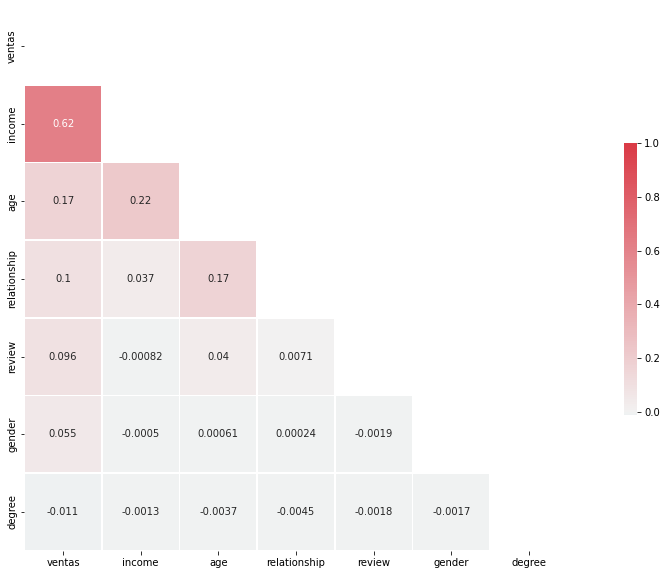

In [ ]:
tienda_2= tienda_2.sort_values(by = 'ventas', axis= 0, ascending=False).sort_values (by= 'ventas', axis=1, ascending=False)
mask= np.triu(np.ones_like(tienda_2, dtype= np.bool))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
 
plt.figure(figsize=(20,10))
sns.heatmap(tienda_2.iloc[0:7, 0:7], mask= mask[0:7, 0:7], cmap= cmap, vmax=1, center=0,
                          square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot = True)
plt.show()

Vistos los resultados, eliminamos la variable 'degree' y hacemos el estudio con el 100% de los datos de las columnas restantes.

In [ ]:
tienda.drop(['degree'], axis=1, inplace=True)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f393b42d4d0>,
      dtype=object)

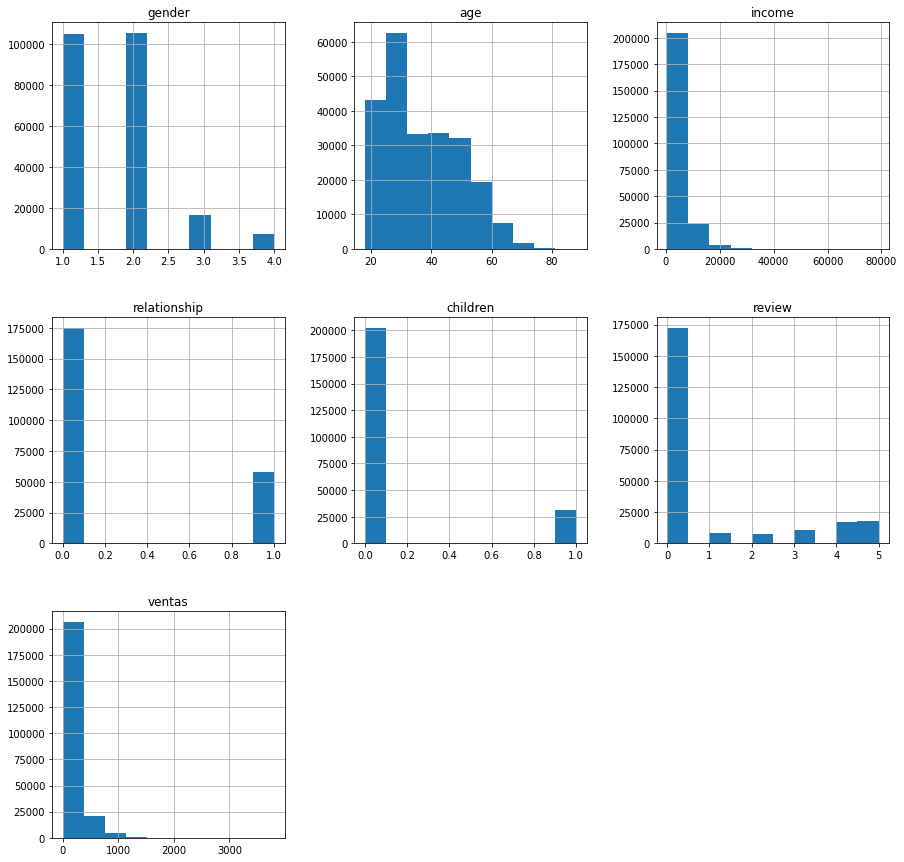

In [ ]:
tienda.hist(figsize=(15,15))

Graficamos la distribución general de mis datos

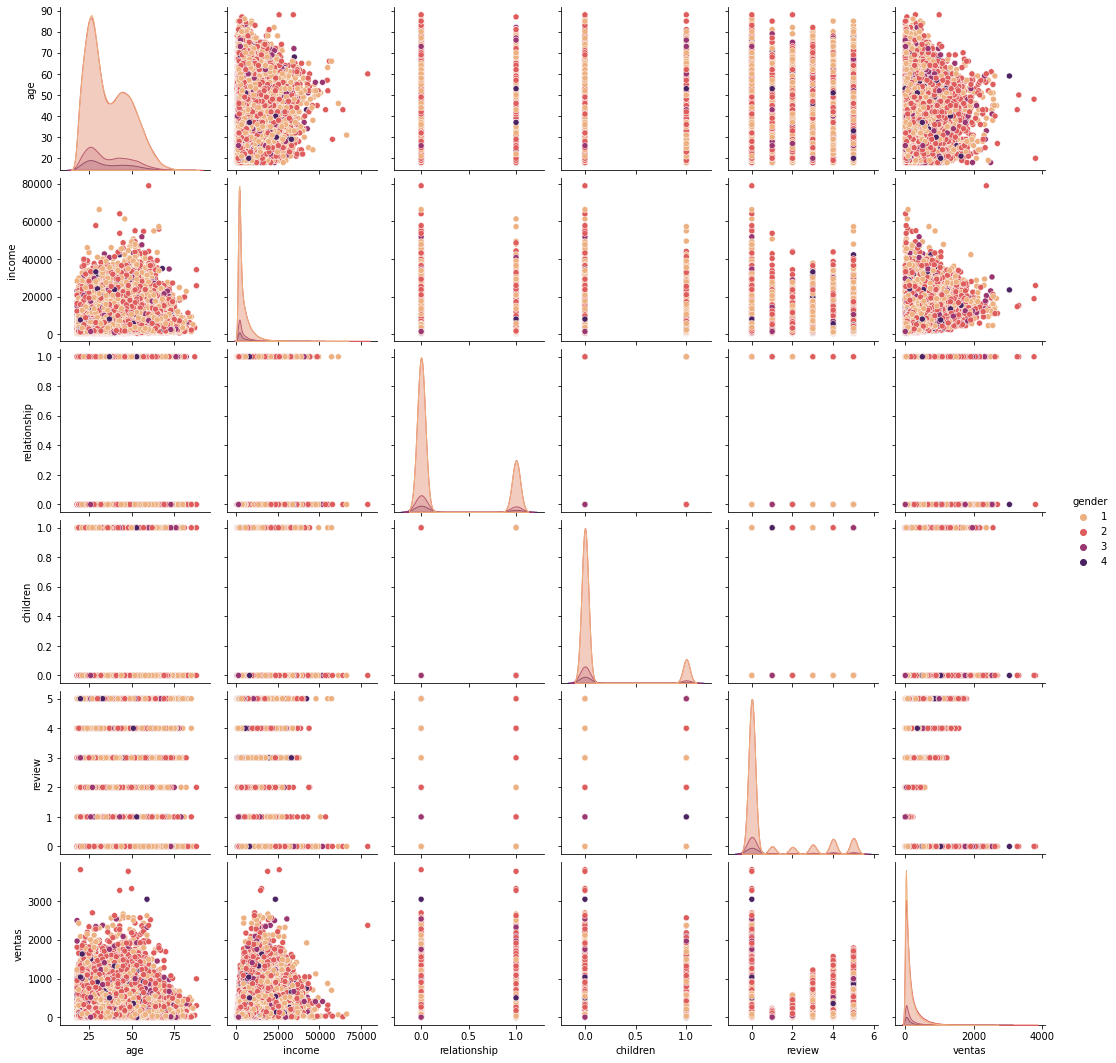

In [ ]:
sns.pairplot(tienda, hue='gender', palette='flare')

In [ ]:
tienda.shape

(233484, 7)

Busco valores duplicados en ambos conjuntos de datos. 

In [ ]:
tienda.duplicated().sum()

1

In [ ]:
print(tienda[tienda.duplicated()])

        gender   age   income  relationship  children  review  ventas
104651       2  43.0  2186.87             0         0       0   188.0


Es mucha coincidencia que en un número tan elevado de datos aparezca un duplicado, así que decido eliminarlo, aunque tampoco va a interferir en el resultado del análisis.

In [ ]:
tienda.drop_duplicates(inplace=True)
tienda.duplicated().sum()

0

In [ ]:
tienda.describe()

,gender,age,income,relationship,children,review,ventas
count,233483.000000,233483.000000,233483.000000,233483.000000,233483.000000,233483.000000,233483.000000
mean,1.680773,36.390200,8.098077,0.249658,0.132841,0.899487,4.374894
std,0.733635,12.326525,0.714293,0.432816,0.339403,1.669963,1.306445
min,1.000000,18.000000,6.218959,0.000000,0.000000,0.000000,1.101940
25%,1.000000,26.000000,7.555991,0.000000,0.000000,0.000000,3.478158
50%,2.000000,33.000000,7.937710,0.000000,0.000000,0.000000,4.471639
75%,2.000000,46.000000,8.598234,0.000000,0.000000,1.000000,5.337538
max,4.000000,88.000000,11.275972,1.000000,1.000000,5.000000,8.027914


Estudiaremos la variable 'ventas', y para poder hacer bien el estudio, vemos su distribución.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 163.45 and sigma = 211.19



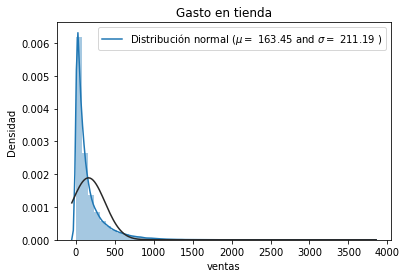

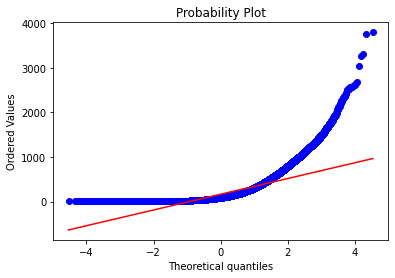

In [ ]:
from scipy import stats

sns.distplot(tienda['ventas'], fit= stats.norm)

# Ajustamos los parámetros para la función normal (para ver mejor las diferencias)
(mu, sigma) = stats.norm.fit(tienda['ventas'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Graficamos la distribución
plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Densidad')
plt.title('Gasto en tienda')

#Mostramos QQ-plot
fig = plt.figure()
res = stats.probplot(tienda['ventas'], plot=plt)
plt.show()



Hacemos una transformación logarítmica para ajustar mejor

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 4.37 and sigma = 1.31



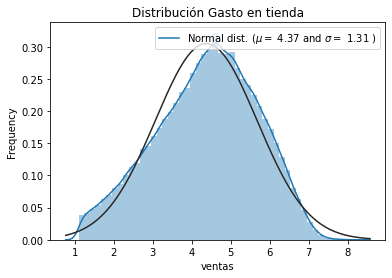

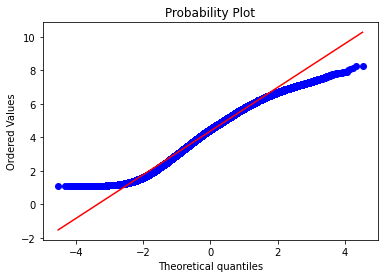

In [ ]:
# Este comando aplica la función log(1+x)
tienda['ventas'] = np.log1p(tienda['ventas'])

# Comprobamos la nueva distribución
sns.distplot(tienda['ventas'] , fit=stats.norm);

# Parámetros normales
(mu, sigma) = stats.norm.fit(tienda['ventas'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Dibujamos la distribución
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribución Gasto en tienda')

#QQ-plot
fig = plt.figure()
res = stats.probplot(tienda['ventas'], plot=plt)
plt.show()

Voy a ver como está distribuida mi variable 'income' ya que es la que está más correlacionada con mis ventas 

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


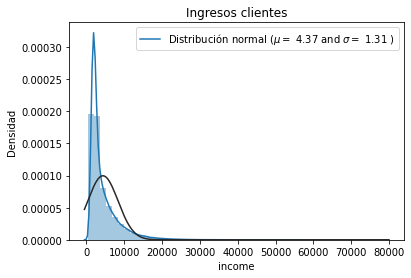

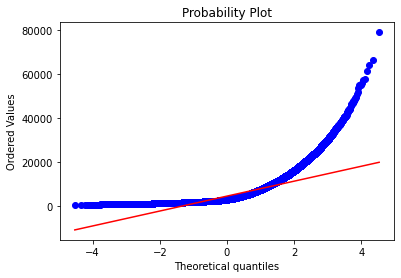

In [ ]:
sns.distplot(tienda['income'], fit= stats.norm)


# Graficamos la distribución
plt.legend(['Distribución normal ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],loc='best')
plt.ylabel('Densidad')
plt.title('Ingresos clientes')

#Mostramos QQ-plot
fig = plt.figure()
res = stats.probplot(tienda['income'], plot=plt)
plt.show()



Aplicamos también un logaritmo para ajustarla y escalarla con nuestra variable de interés, ya que ambas se refieren a valores con la misma escala

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 8.10 and sigma = 0.71



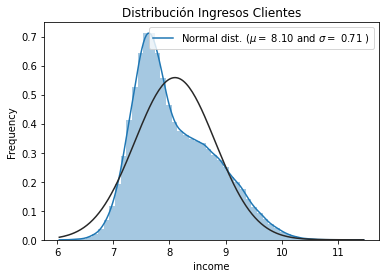

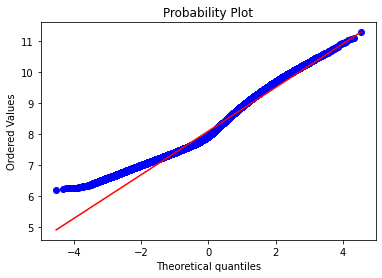

In [ ]:
# Este comando aplica la función log(1+x)
tienda['income'] = np.log1p(tienda['income'])

# Comprobamos la nueva distribución
sns.distplot(tienda['income'] , fit=stats.norm);

# Parámetros normales
(mu, sigma) = stats.norm.fit(tienda['income'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

# Dibujamos la distribución
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('Distribución Ingresos Clientes')

#QQ-plot
fig = plt.figure()
res = stats.probplot(tienda['income'], plot=plt)
plt.show()

# Búsqueda de valores atípicos (outliers)

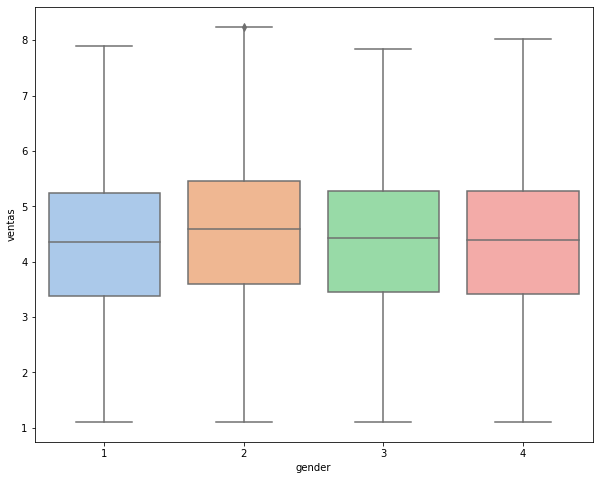

In [ ]:
dims= (10, 8)
fig, ax = plt.subplots(figsize=dims )
sns.boxplot(data= tienda, x = 'gender', y = 'ventas', ax = ax, palette='pastel')

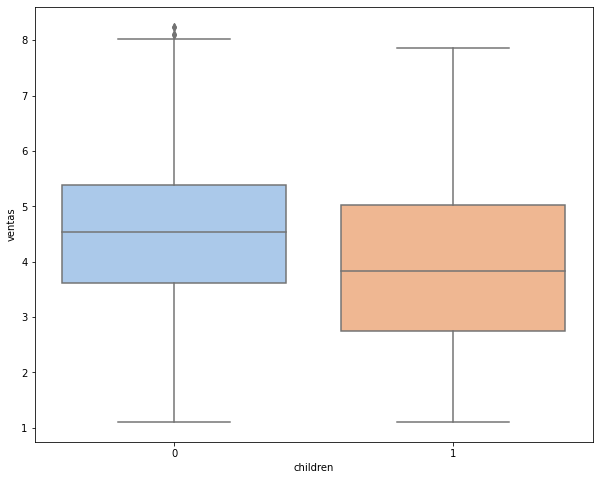

In [ ]:
dims= (10, 8)
fig, ax = plt.subplots(figsize=dims )
sns.boxplot(data= tienda, x = 'children', y = 'ventas', palette='pastel')

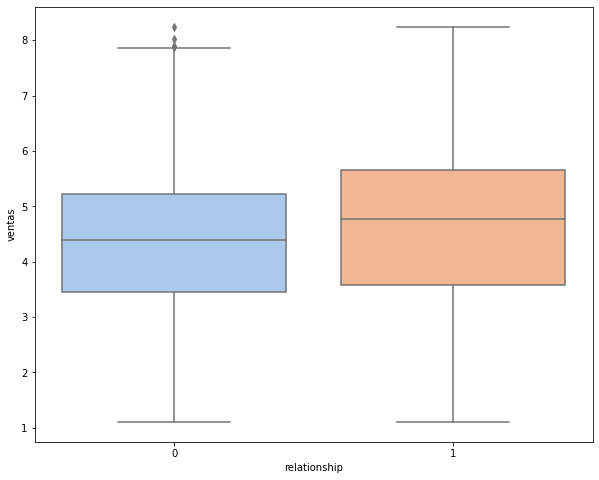

In [ ]:
dims= (10, 8)
fig, ax = plt.subplots(figsize=dims )
sns.boxplot(data= tienda, x = 'relationship', y = 'ventas', palette='pastel')

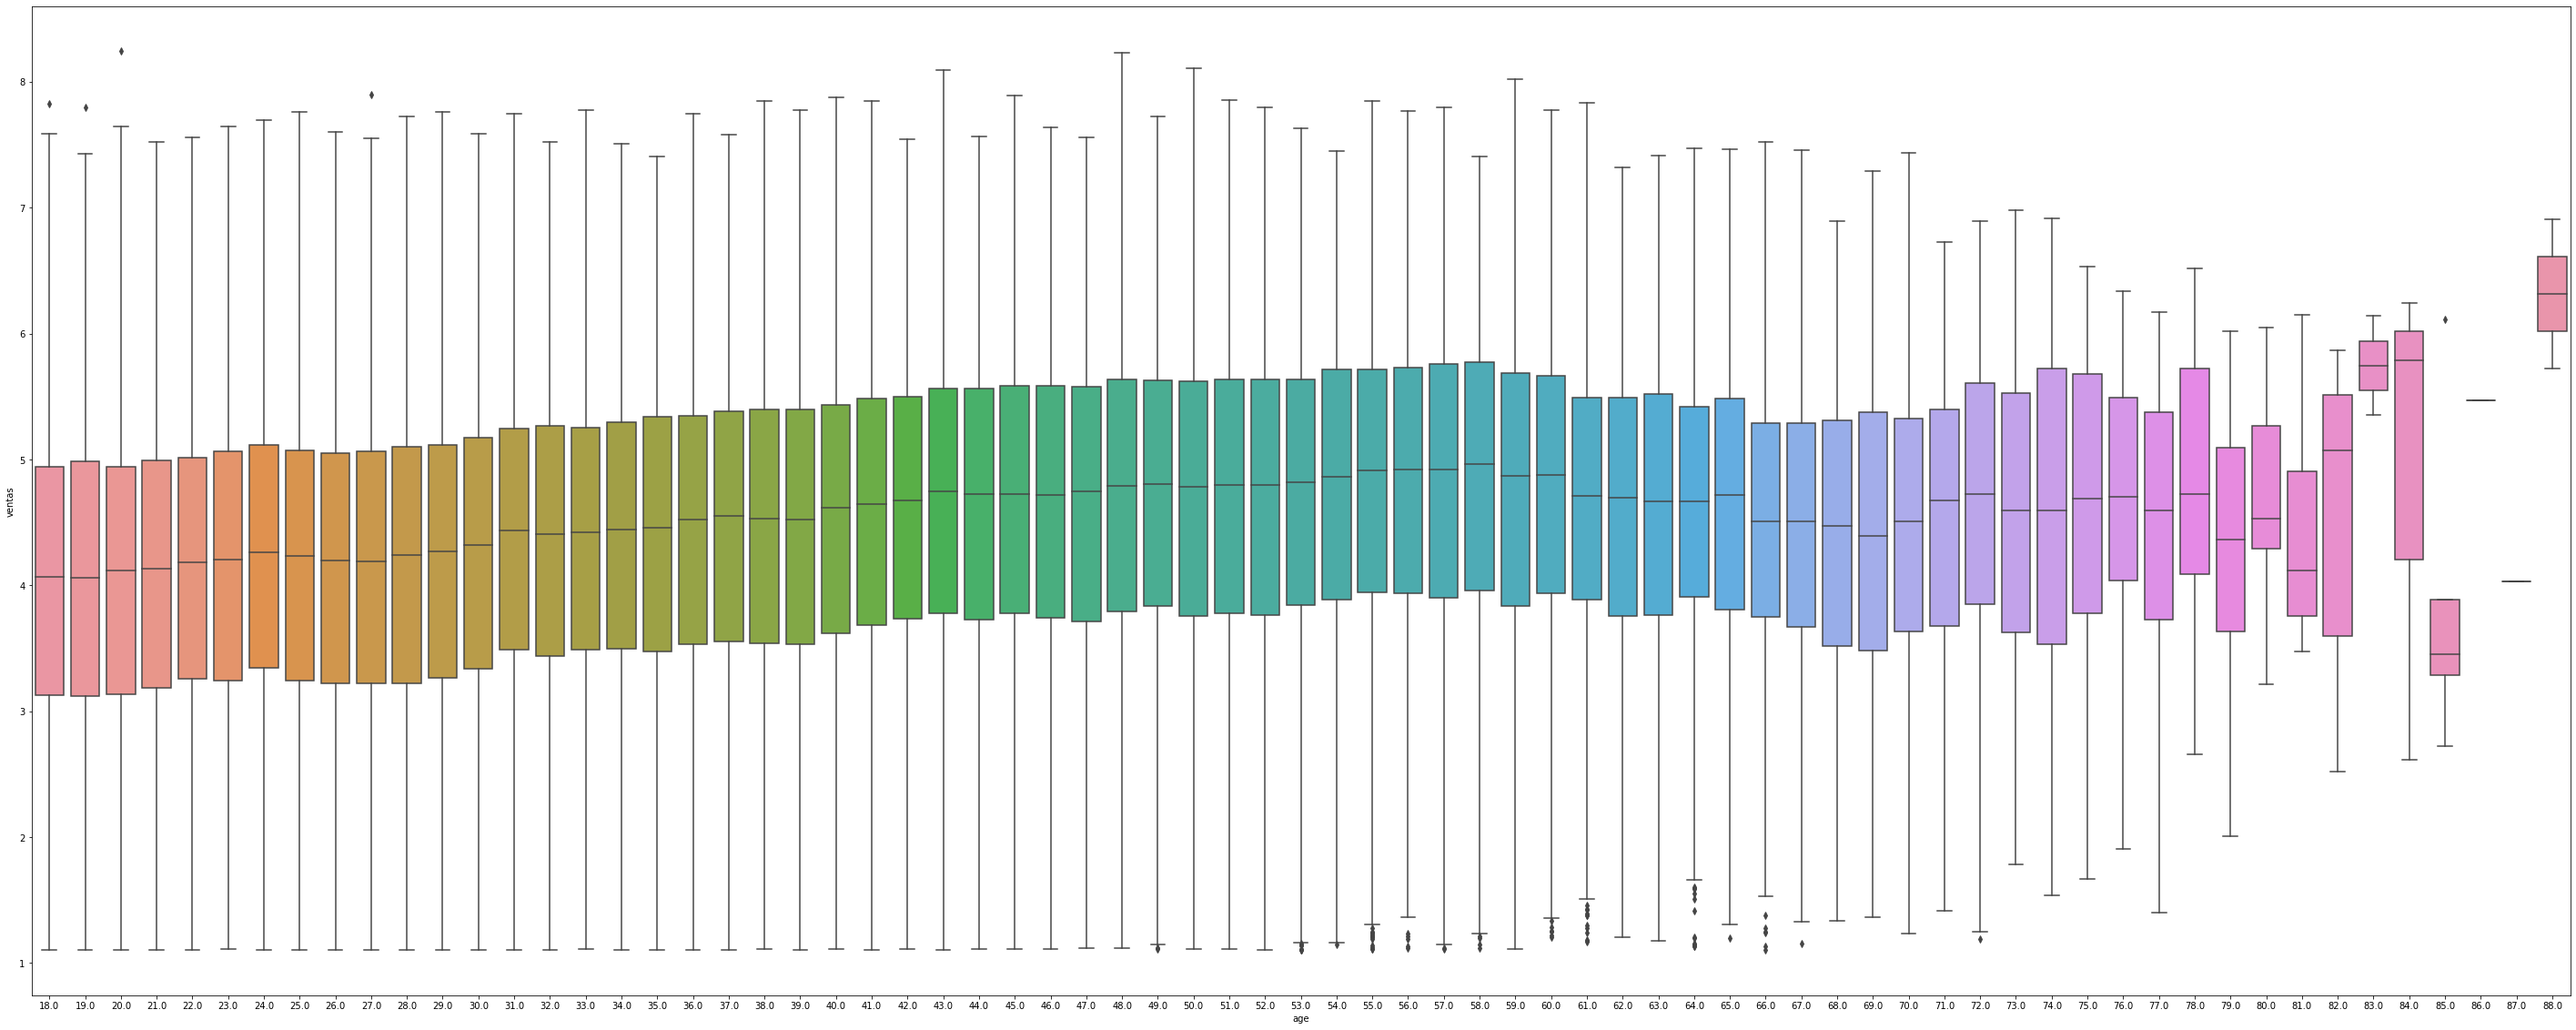

In [ ]:
dims= (50, 20)
fig, ax = plt.subplots(figsize=dims )
sns.boxplot(data= tienda, x = 'age', y = 'ventas')

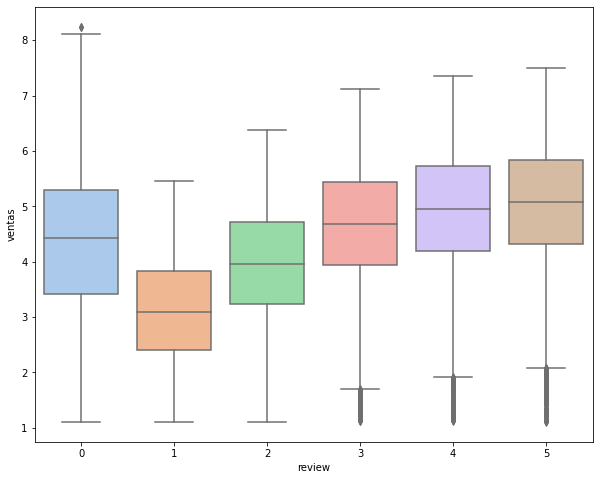

In [ ]:
dims= (10, 8)
fig, ax = plt.subplots(figsize=dims )
sns.boxplot(data= tienda, x = 'review', y = 'ventas', palette='pastel')

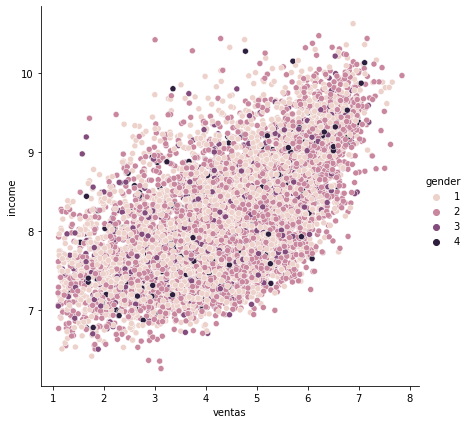

In [ ]:
g = sns.relplot(data = grafica, x = 'ventas', y = 'income', hue = 'gender', height = 6)

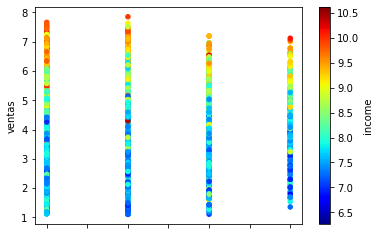

In [ ]:
grafica.plot.scatter(x='gender', y='ventas', c='income', colormap='jet')

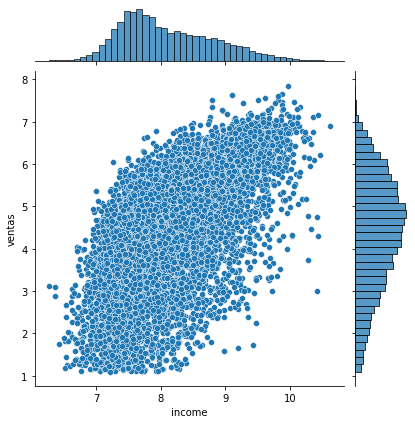

In [ ]:
sns.jointplot(x='income', y='ventas', data=grafica, kind='scatter')

Podemos apreciar presencia de outliers en los datos, procedemos a ajustarlos entre los valores límite del primer y tercer cuartil

Primero definimos la función y después la empleamos con las variables que queremos

In [ ]:
def reemplazar_outtiers(data, group_variables, label):
    
  data_aux = data
  Q3 = data_aux[group_variables + label].groupby(group_variables).quantile(.75)
  Q1 = data_aux[group_variables + label].groupby(group_variables).quantile(.25)
  IQR = Q3-Q1
  upper_limit = Q3+1.5*IQR
  lower_limit = Q1-1.5*IQR
  upper_limit.columns = [col + '_ul' for col in label]
  lower_limit.columns = [col + '_ll' for col in label]
  data_aux = data_aux.join(upper_limit, on = group_variables, how = 'left')
  data_aux.loc[data_aux.loc[:,label].values[:,0] > data_aux.loc[:,upper_limit.columns].values[:,0],label] = data_aux.loc[data_aux.loc[:,label].values[:,0] > data_aux.loc[:,upper_limit.columns].values[:,0],upper_limit.columns].values
  data_aux = data_aux.join(lower_limit, on = group_variables, how = 'left')
  data_aux.loc[data_aux.loc[:,label].values[:,0] < data_aux.loc[:,lower_limit.columns].values[:,0],label] = data_aux.loc[data_aux.loc[:,label].values[:,0] < data_aux.loc[:,lower_limit.columns].values[:,0],lower_limit.columns].values
  return data_aux.loc[:,label].values

In [ ]:
tienda.loc[:,'ventas']= reemplazar_outtiers(tienda,['income'],['ventas'])
tienda.loc[:,'ventas']= reemplazar_outtiers(tienda,['children'],['ventas'])
tienda.loc[:,'ventas']= reemplazar_outtiers(tienda,['relationship'],['ventas'])
tienda.loc[:,'ventas']= reemplazar_outtiers(tienda,['age'],['ventas'])
tienda.loc[:,'ventas']= reemplazar_outtiers(tienda,['review'],['ventas'])

Verificamos que se han reajustado mis outliers representando una de las gráficas anteriormente vistas

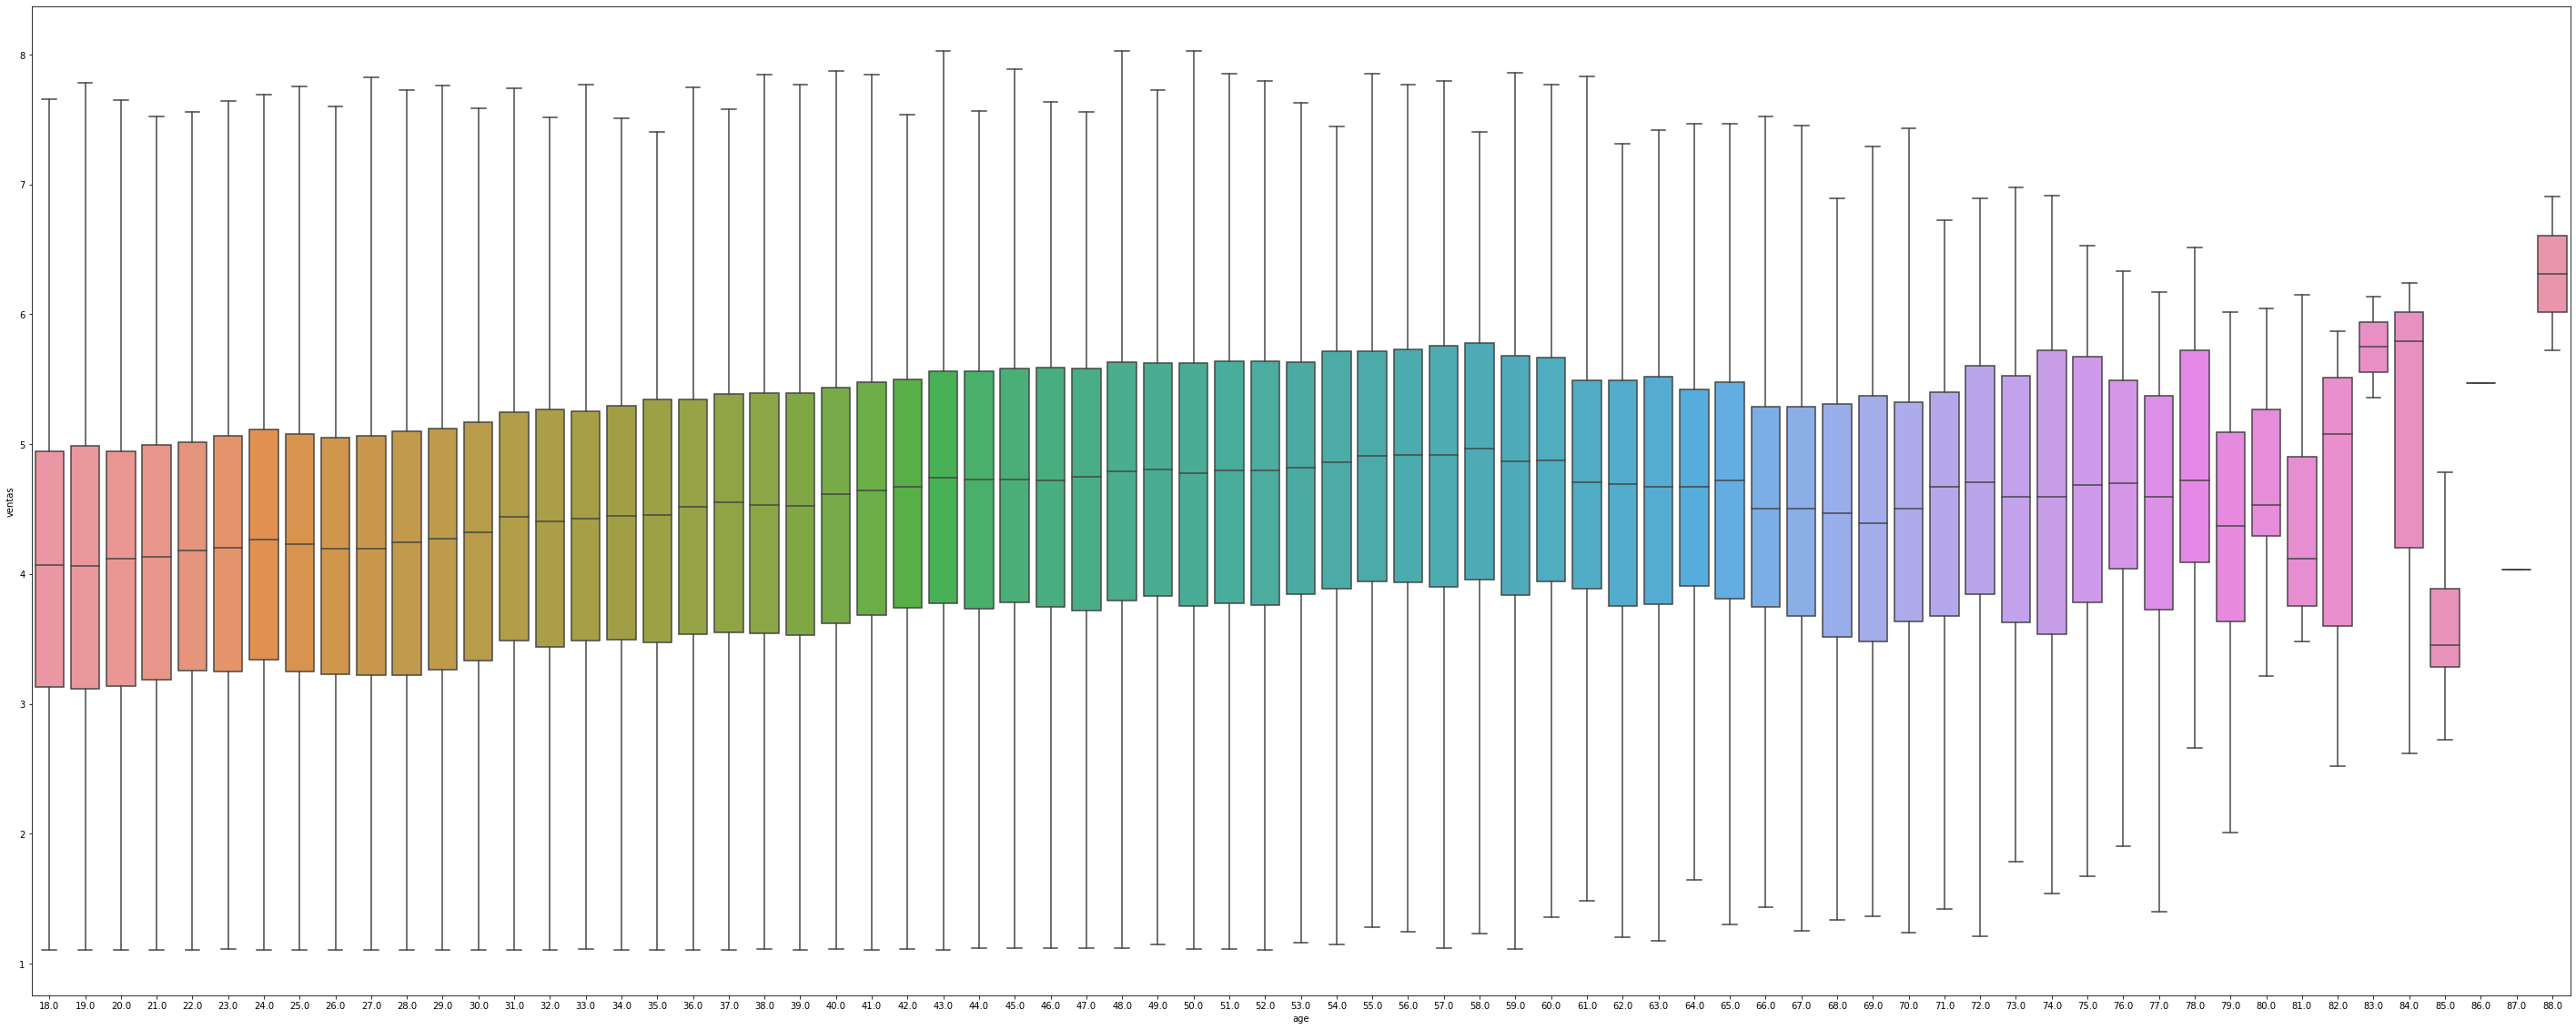

In [ ]:
dims= (50, 20)
fig, ax = plt.subplots(figsize=dims )
sns.boxplot(data= tienda, x = 'age', y = 'ventas')

# 3. Creamos un modelo para poder predecir el gasto según tipo cliente.
Usaremos un modelo supervisado de random forest Regression,ya que nuestra variable ventas en numérica y no categórica



Entrenamos el modelo con el 80% de nuestros datos y testeamos con el 20% restante. Previamente importamos las librerias necesarias

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc, confusion_matrix, classification_report

from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve,auc, confusion_matrix, classification_report

from sklearn.ensemble import RandomForestRegressor


Creamos nuestro pipeline con escala StandardScaler y con el modelo RandomForestRegressor

In [ ]:
mimodelo= Pipeline( steps=[('scaler', StandardScaler()),('modelo', RandomForestRegressor())])

In [ ]:
# preparamos los datos para nuestro modelo
X_train, X_test, y_train, y_test = train_test_split(
    tienda.drop('ventas', axis = 1), tienda['ventas'], test_size=0.3,
    random_state= 200)

In [ ]:
type(mimodelo)

sklearn.pipeline.Pipeline

In [ ]:
X_train.shape

(163438, 6)

In [ ]:
y_train.shape

(163438,)

In [ ]:
y_test.shape

(70045,)

Entrenamos el modelo con los datos de train

In [ ]:
mimodelo.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('modelo', RandomForestRegressor())])

Verificamos cómo de bien se ha entrenado mi modelo, mediante una validación simple, importamos las librerias necesarias

In [ ]:
from sklearn.datasets import make_blobs


from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

In [ ]:
predicciones= mimodelo.predict(X_test)
predicciones

array([3.70707259, 5.57659019, 5.98167388, ..., 4.26530101, 2.93378445,
       4.26662871])

Calculamos el error cuadrático medio de mi modelo

In [ ]:
mse= mean_squared_error(y_test, predicciones)
mse

1.026397679053306

In [ ]:
mimodelo.score(X_test, y_test)

0.4016155622647455

Calculamos la media de los errores absolutos de mi modelo

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean= mean_absolute_error(y_test, predicciones)
mean

0.7769838230760029

En el  estudio a futuro de implementación de modelos de machine learning, se buscará mejorar los hiperpármetros de los posibles modelos, así como realización de validaciones de dicho modelo. 



# Gracias a este estudio podemos observar:
* Nuestro clientes principales son hombres y mujeres
* Acorde la edad del cliente es mayor, el cliente consume más en nuestra tienda
* Plantear a los 'comercios' recopilar otro tipo de información para obtener conclusiones más valiosas a la hora de mejorar las ventas. Así como eliminar determinada información que no aporta valor.
* Con las conclusiones obtenidas poder lanzar campañas específicas a un colectivo determinado de clientes, evitando saturar al grupo restante de clientes, y mejorar tanto nuestras ventas como la satisfacción de nuestros clientes.
* Promover captación de futuros clientes tipo, acorde a las características de estos, y poder testear dichos resutados mediante metodologías AB testing.
